Loading cached camera calibration... Done.


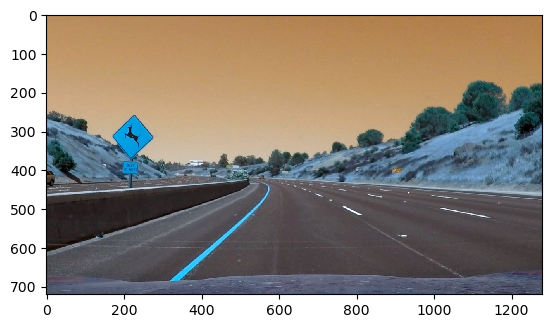

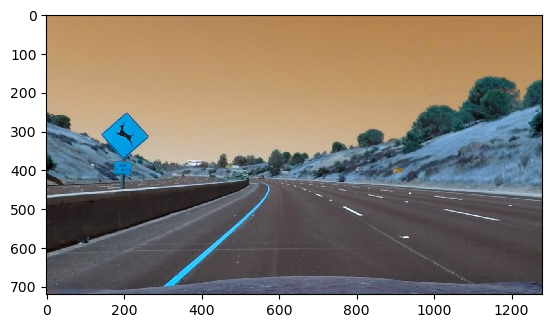

In [15]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import os.path as path
import pickle


def lazy_calibration(func):
    """
    Decorator for calibration function to avoid re-computing calibration every time.
    """
    calibration_cache = 'camera_cal/calibration_data.pickle'

    def wrapper(*args, **kwargs):
        if path.exists(calibration_cache):
            print('Loading cached camera calibration...', end=' ')
            with open(calibration_cache, 'rb') as dump_file:
                calibration = pickle.load(dump_file)
        else:
            print('Computing camera calibration...', end=' ')
            calibration = func(*args, **kwargs)
            with open(calibration_cache, 'wb') as dump_file:
                pickle.dump(calibration, dump_file)
        print('Done.')
        return calibration

    return wrapper


@lazy_calibration
def calibrate_camera(calib_images_dir, verbose=False):
    """
    Calibrate the camera given a directory containing calibration chessboards.

    :param calib_images_dir: directory containing chessboard frames
    :param verbose: if True, draw and show chessboard corners
    :return: calibration parameters
    """

    assert path.exists(calib_images_dir), '"{}" must exist and contain calibration images.'.format(calib_images_dir)

    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6 * 9, 3), np.float32)
    objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

    # Arrays to store object points and image points from all the images.
    objpoints = []  # 3d points in real world space
    imgpoints = []  # 2d points in image plane.

    # Make a list of calibration images
    images = glob.glob(path.join(calib_images_dir, 'calibration*.jpg'))

    # Step through the list and search for chessboard corners
    for filename in images:

        img = cv2.imread(filename)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        pattern_found, corners = cv2.findChessboardCorners(gray, (9, 6), None)

        if pattern_found is True:
            objpoints.append(objp)
            imgpoints.append(corners)

            if verbose:
                # Draw and display the corners
                img = cv2.drawChessboardCorners(img, (9, 6), corners, pattern_found)
                cv2.imshow('img',img)
                cv2.waitKey(500)

    if verbose:
        cv2.destroyAllWindows()

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    return ret, mtx, dist, rvecs, tvecs


def undistort(frame, mtx, dist, verbose=False):
    """
    Undistort a frame given camera matrix and distortion coefficients.
    :param frame: input frame
    :param mtx: camera matrix
    :param dist: distortion coefficients
    :param verbose: if True, show frame before/after distortion correction
    :return: undistorted frame
    """
    frame_undistorted = cv2.undistort(frame, mtx, dist, newCameraMatrix=mtx)

    if verbose:
        fig, ax = plt.subplots(nrows=1, ncols=2)
        ax[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        ax[1].imshow(cv2.cvtColor(frame_undistorted, cv2.COLOR_BGR2RGB))
        plt.show()

    return frame_undistorted


if __name__ == '__main__':

    ret, mtx, dist, rvecs, tvecs = calibrate_camera(calib_images_dir='camera_cal')

    img = cv2.imread('test_images/test2.jpg')

    img_undistorted = undistort(img, mtx, dist)

    plt.imshow(img)
    plt.show()
    plt.imshow(img_undistorted)
    plt.show()

In [16]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import os.path as path
import pickle


calibration_cache = 'camera_cal/calibration_data.pickle'


with open(calibration_cache, 'rb') as dump_file:
    calibration = pickle.load(dump_file)


AttributeError: 'AxesSubplot' object has no attribute 'set_axis_bgcolor'